In [2]:
import rtree
import geopandas as gpd
import numpy as np
import os, glob

In [3]:
comuni_trentini = gpd.read_file('data' + os.sep + 'comuni_trentini.gpkg')

In [4]:
comuni_trentini = comuni_trentini.to_crs(epsg=4326)

In [5]:
confini_pat = comuni_trentini.dissolve()
confini_pat.to_file("confini_pat.geojson",driver="GeoJSON")

In [6]:
confine_trento = comuni_trentini[comuni_trentini.PRO_COM_T=='022205']
confine_trento.to_file("trento.geojson",driver="GeoJSON")

In [7]:
comuni5k  = comuni_trentini[comuni_trentini.POPOLAZIONE <= 5000]

In [8]:
os.chdir('data')
geojson_files = glob.glob("*.geojson")
os.chdir("..")
areasdata = "data" + os.sep + "areas30km"
if not os.path.exists(areasdata):
    os.makedirs(areasdata)

In [9]:
confine_verona = gpd.read_file('data' + os.sep + "verona.geojson")
confine_belluno = gpd.read_file('data' + os.sep + "belluno.geojson")
confine_bolzano = gpd.read_file('data' + os.sep + 'bolzano.geojson')
exclude = []
exclude.append("verona")
exclude.append("belluno")
exclude.append("bolzano")

In [10]:
def getGeometry(comune_id):
    geocomune = comuni5k[comuni5k.PRO_COM_T == comune_id]
    geocomune30k = gpd.read_file('data' + os.sep + comune_id + ".geojson")
    unionecomune30k = gpd.overlay(geocomune30k, geocomune, how='union').dissolve()
    unionecomune30k['CROSSTN'] = 0
    unionecomune30k['OUTSIDE'] = 0
    unionecomune30k['CROSSBL'] = 0
    unionecomune30k['CROSSBZ'] = 0
    area = unionecomune30k.geometry[unionecomune30k.index[0]]
    trento = confine_trento.geometry[confine_trento.index[0]]
    verona = confine_verona.geometry[confine_verona.index[0]]
    belluno = confine_belluno.geometry[confine_belluno.index[0]]
    bolzano = confine_bolzano.geometry[confine_bolzano.index[0]]
    provincia = confini_pat.geometry[confini_pat.index[0]]
    if (area.intersects(trento)):
        unionecomune30k = gpd.overlay(unionecomune30k,confine_trento,how='difference')
        unionecomune30k['CROSSTN'] = 1
    if (area.intersects(verona)):
        unionecomune30k = gpd.overlay(unionecomune30k,confine_verona,how='difference')
        unionecomune30k['CROSSVR'] = 1
    if (area.intersects(belluno)):
        unionecomune30k = gpd.overlay(unionecomune30k,confine_belluno,how="difference")
        unionecomune30k['CROSSBL'] = 1
    if (area.intersects(bolzano)):
        unionecomune30k = gpd.overlay(unionecomune30k,confine_bolzano,how="difference")
        unionecomune30k['CROSSBZ'] = 1
    if (area.intersects(provincia)):
        unionecomune30k['OUTSIDE'] = 1
    return(unionecomune30k[['geometry','COMUNE','PRO_COM_T','CROSSTN','CROSSBL','CROSSBZ']])

In [11]:
for geojson in geojson_files:
    comune_id = geojson.replace(".geojson","")
    if ((comune_id in exclude) == False):
        filesize = os.stat("data" + os.sep + geojson).st_size
        if filesize > 194:
            newgeom = getGeometry(comune_id)
            filename = areasdata + os.sep + comune_id + ".geojson"
            newgeom.to_file(filename,driver="GeoJSON")
        else:
            print(comune_id)

In [12]:
print(comune_id)

022233


<AxesSubplot:>

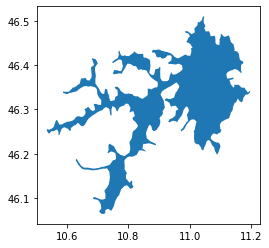

In [13]:
newgeom.plot()

In [14]:
a

NameError: name 'a' is not defined

In [43]:
a[['geometry','COMUNE','PRO_COM_TN','CROSSTN']].to_file("/tmp/ciapa.shp")

In [28]:
union.to_file("union.geojson",driver="GeoJSON")